In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
df1=pd.read_excel('X_bp.xlsx')
df2=pd.read_excel('X_nup.xlsx')

In [4]:
df1.shape

(1023, 11)

In [5]:
df1.head(3)

Unnamed: 0  Соотношение матрица-наполнитель  Плотность, кг/м3  \
0           0                         1.857143            2030.0   
1           1                         1.857143            2030.0   
2           2                         1.857143            2030.0   

   модуль упругости, ГПа  Количество отвердителя, м.%  \
0             738.736842                         30.0   
1             738.736842                         50.0   
2             738.736842                         49.9   

   Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                        22.267857                100.000000   
1                        23.750000                284.615385   
2                        33.000000                284.615385   

   Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                          210.0                                  70.0   
1                          210.0                                  70.0   
2                          210.0                                  70.0   

   Прочность при растяжении, МПа  Потребление смолы, г/м2  
0                         3000.0                    220.0  
1                         3000.0                    220.0  
2                         3000.0                    220.0

In [6]:
df2.shape

(1040, 4)

In [7]:
df2.head(3)

Unnamed: 0  Угол нашивки, град  Шаг нашивки  Плотность нашивки
0           0                   0          4.0               57.0
1           1                   0          4.0               60.0
2           2                   0          4.0               70.0

In [8]:
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

C:\Users\AORUS SID\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AORUS SID\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AORUS SID\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AORUS SID\

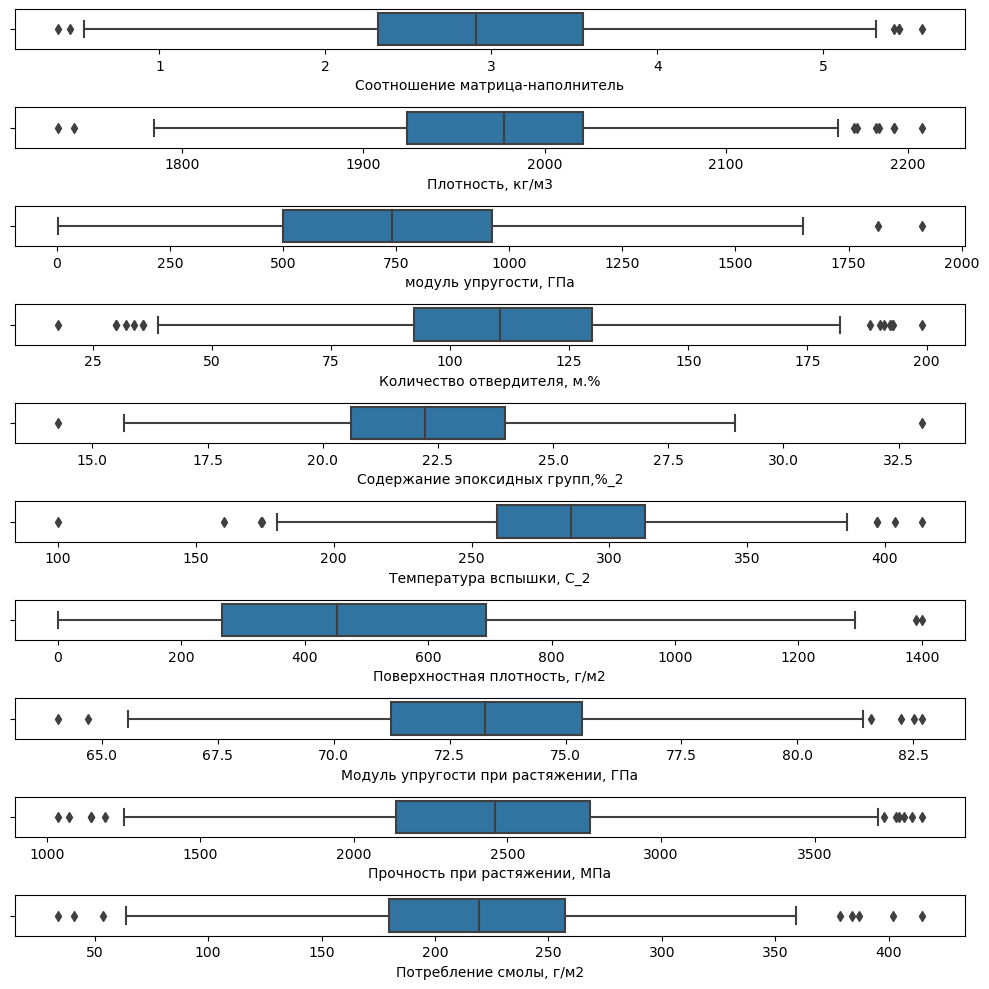

In [9]:
fig, axs = plt.subplots(10, figsize = (10,10))
plt1 = sns.boxplot(df1['Соотношение матрица-наполнитель'], ax = axs[0])
plt2 = sns.boxplot(df1['Плотность, кг/м3'], ax = axs[1])
plt3 = sns.boxplot(df1['модуль упругости, ГПа'], ax = axs[2])
plt4 = sns.boxplot(df1['Количество отвердителя, м.%'], ax = axs[3])
plt5 = sns.boxplot(df1['Содержание эпоксидных групп,%_2'], ax = axs[4])
plt6 = sns.boxplot(df1['Температура вспышки, С_2'], ax = axs[5])
plt7 = sns.boxplot(df1['Поверхностная плотность, г/м2'], ax = axs[6])
plt8 = sns.boxplot(df1['Модуль упругости при растяжении, ГПа'], ax = axs[7])
plt9 = sns.boxplot(df1['Прочность при растяжении, МПа'], ax = axs[8])
plt10 = sns.boxplot(df1['Потребление смолы, г/м2'], ax = axs[9])
plt.tight_layout()

C:\Users\AORUS SID\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AORUS SID\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AORUS SID\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


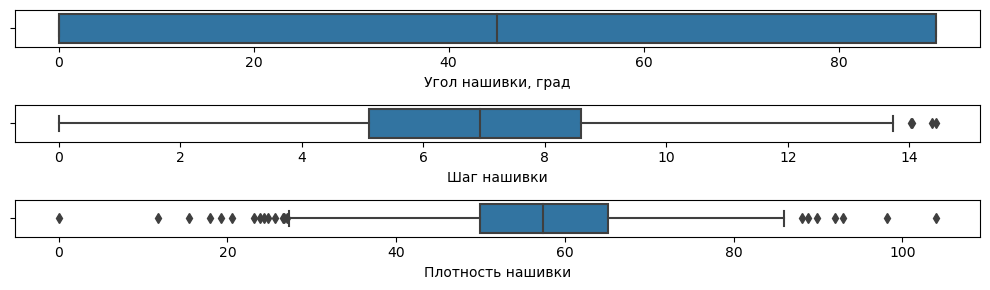

In [10]:
fig, axs = plt.subplots(3, figsize = (10,3))
plt1 = sns.boxplot(df2['Угол нашивки, град'], ax = axs[0])
plt2 = sns.boxplot(df2['Шаг нашивки'], ax = axs[1])
plt3 = sns.boxplot(df2['Плотность нашивки'], ax = axs[2])
plt.tight_layout()

In [11]:
df = pd.merge(df1, df2, how="inner")
df.drop(['Unnamed: 0','Температура вспышки, С_2', 'модуль упругости, ГПа', 'Содержание эпоксидных групп,%_2', 'Угол нашивки, град', 'Поверхностная плотность, г/м2'], axis=1, inplace=True)
df.head(3)

Соотношение матрица-наполнитель  Плотность, кг/м3  \
0                         1.857143            2030.0   
1                         1.857143            2030.0   
2                         1.857143            2030.0   

   Количество отвердителя, м.%  Модуль упругости при растяжении, ГПа  \
0                         30.0                                  70.0   
1                         50.0                                  70.0   
2                         49.9                                  70.0   

   Прочность при растяжении, МПа  Потребление смолы, г/м2  Шаг нашивки  \
0                         3000.0                    220.0          4.0   
1                         3000.0                    220.0          4.0   
2                         3000.0                    220.0          4.0   

   Плотность нашивки  
0               57.0  
1               60.0  
2               70.0

<AxesSubplot:>

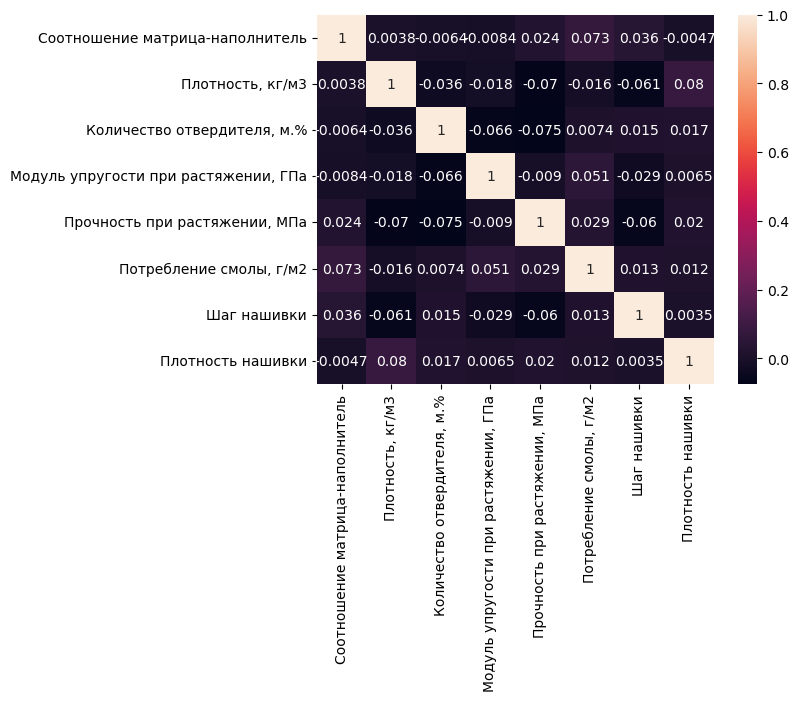

In [12]:
sns.heatmap(df.corr(), annot=True)

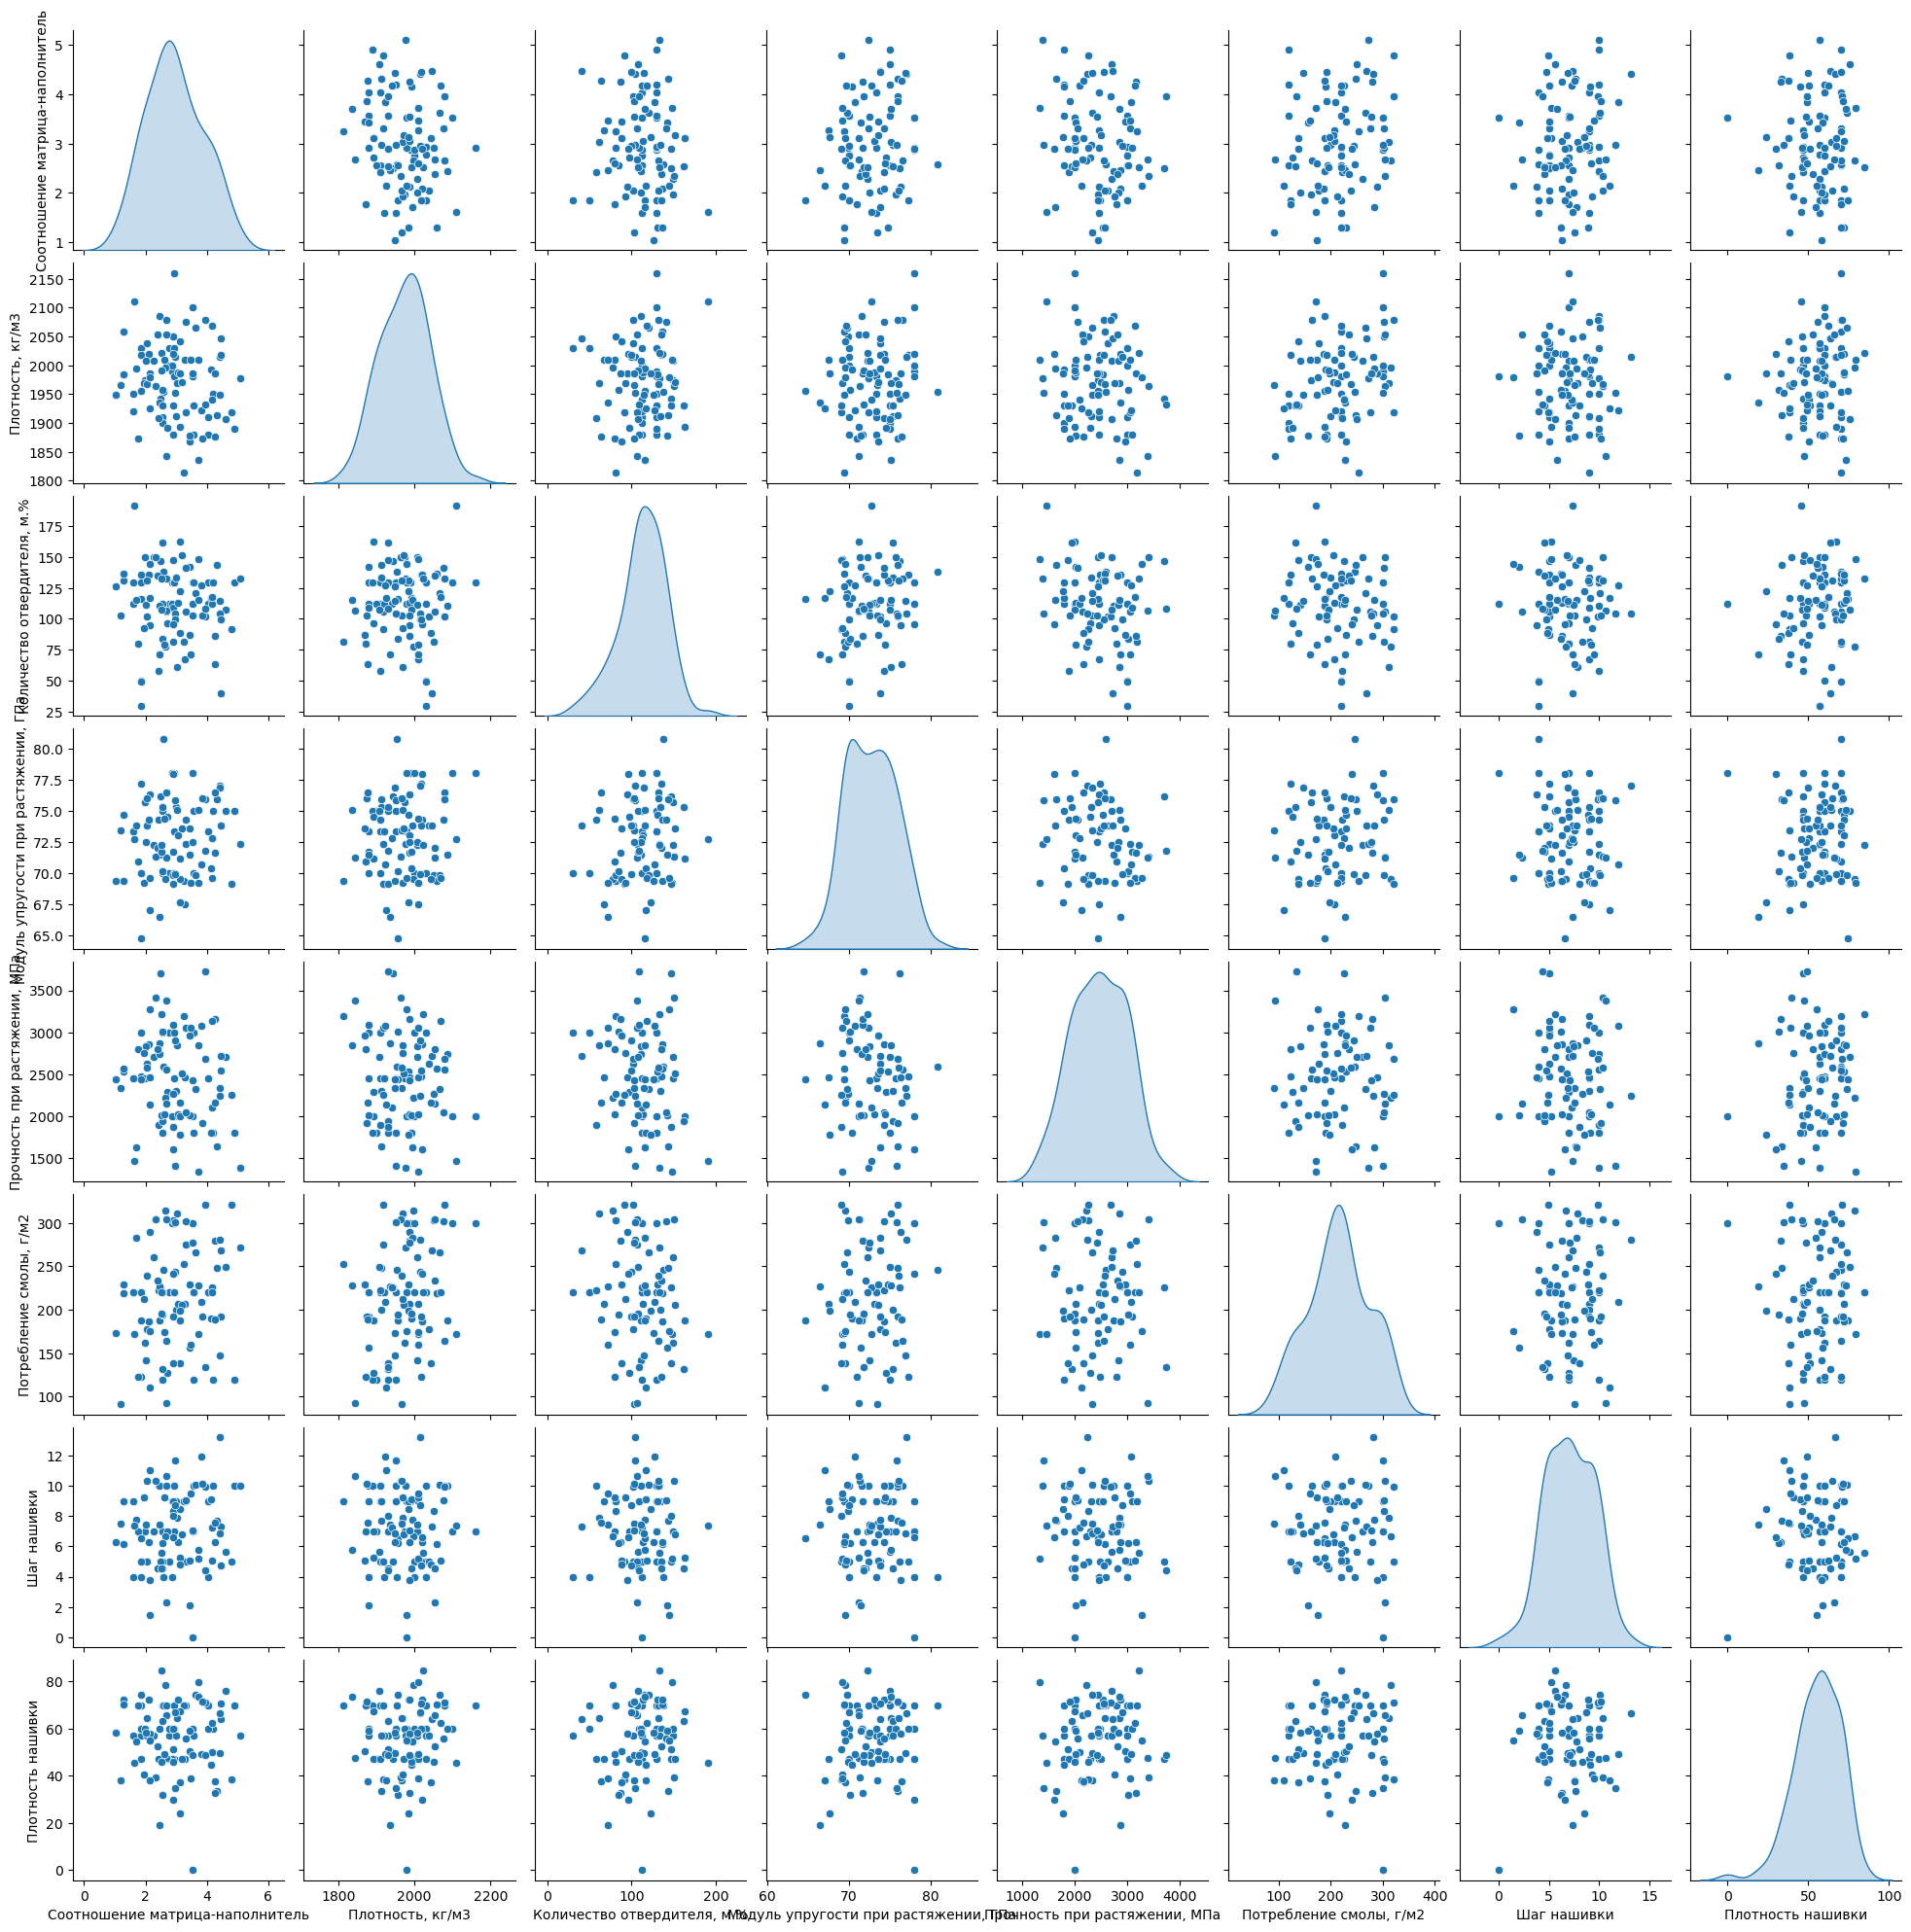

In [13]:
sns.pairplot(df.head(100), diag_kind='kde', palette='cbar')

In [14]:
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
Количество отвердителя, м.%             0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   Количество отвердителя, м.%           1023 non-null   float64
 3   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 4   Прочность при растяжении, МПа         1023 non-null   float64
 5   Потребление смолы, г/м2               1023 non-null   float64
 6   Шаг нашивки                           1023 non-null   float64
 7   Плотность нашивки                     1023 non-null   float64
dtypes: float64(8)
memory usage: 71.9 KB


In [16]:
from sklearn.decomposition import PCA
features = [
    'Плотность, кг/м3',
    'Количество отвердителя, м.%',
    'Модуль упругости при растяжении, ГПа',
    'Прочность при растяжении, МПа',
    'Потребление смолы, г/м2',
    'Шаг нашивки',
    'Плотность нашивки'
]

X = df.copy()
y = X.pop("Соотношение матрица-наполнитель")
X = X.loc[:, features]

# Стандартизация
X_stand = (X - X.mean(axis=0)) / X.std(axis=0)

pca = PCA()
X_pca = pca.fit_transform(X_stand)

# Переводим результат в Pandas Dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)
# В loading записываем "смысловую нагрузку" компонент, их корреляцию с исходными
loadings = pd.DataFrame(
    pca.components_.T,
    columns=component_names,
    index=X.columns,
)

print(loadings)

                                           PC1       PC2       PC3       PC4  \
Плотность, кг/м3                     -0.042899  0.755178  0.039010  0.123216   
Количество отвердителя, м.%          -0.561243 -0.087856  0.117241 -0.343571   
Модуль упругости при растяжении, ГПа  0.433295 -0.008695  0.503498  0.436031   
Прочность при растяжении, МПа         0.549665 -0.199338 -0.318839 -0.531938   
Потребление смолы, г/м2               0.229482 -0.163900  0.650802 -0.303280   
Шаг нашивки                          -0.374693 -0.337729  0.345030  0.016312   
Плотность нашивки                     0.015253  0.491175  0.294916 -0.549046   

                                           PC5       PC6       PC7  
Плотность, кг/м3                     -0.025226  0.389497  0.508742  
Количество отвердителя, м.%           0.553458 -0.281266  0.400093  
Модуль упругости при растяжении, ГПа  0.123098 -0.511491  0.302936  
Прочность при растяжении, МПа        -0.117636 -0.025167  0.508965  
Потребление см

In [17]:
fig, axs = plt.subplots(1, 2)
n = pca.n_components_
grid = np.arange(1, n + 1)

evr = pca.explained_variance_ratio_
axs[0].bar(grid, evr)
axs[0].set(xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0))

cv = np.cumsum(evr)
axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
axs[1].set(xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0))

fig.set(figwidth=8, dpi=100)

[None, None]

In [18]:
sns.histplot(df)

<AxesSubplot:ylabel='Count'>

In [19]:
df.drop(['Потребление смолы, г/м2','Шаг нашивки', 'Плотность нашивки'], axis=1, inplace=True)
df.head(3)

Соотношение матрица-наполнитель  Плотность, кг/м3  \
0                         1.857143            2030.0   
1                         1.857143            2030.0   
2                         1.857143            2030.0   

   Количество отвердителя, м.%  Модуль упругости при растяжении, ГПа  \
0                         30.0                                  70.0   
1                         50.0                                  70.0   
2                         49.9                                  70.0   

   Прочность при растяжении, МПа  
0                         3000.0  
1                         3000.0  
2                         3000.0

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   Количество отвердителя, м.%           1023 non-null   float64
 3   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 4   Прочность при растяжении, МПа         1023 non-null   float64
dtypes: float64(5)
memory usage: 48.0 KB


In [128]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
df_scaled = scaler.fit_transform(df)
print(df.mean(axis=0))
print(df.std(axis=0))

Соотношение матрица-наполнитель            2.930366
Плотность, кг/м3                        1975.734888
Количество отвердителя, м.%              110.570769
Модуль упругости при растяжении, ГПа      73.328571
Прочность при растяжении, МПа           2466.922843
dtype: float64
Соотношение матрица-наполнитель           0.913222
Плотность, кг/м3                         73.729231
Количество отвердителя, м.%              28.295911
Модуль упругости при растяжении, ГПа      3.118983
Прочность при растяжении, МПа           485.628006
dtype: float64


In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=0)
X_train.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
1020                         3.280604       1972.372865   
603                          3.651050       1899.052981   
10                           2.919678       2160.000000   
105                          2.683929       1996.672056   
68                           2.681941       1843.182562   

      Количество отвердителя, м.%  Модуль упругости при растяжении, ГПа  
1020                   110.533477                             74.734344  
603                    136.682725                             69.954877  
10                     129.000000                             78.000000  
105                    100.701483                             69.842242  
68                     106.823808                             71.215032

In [130]:
y_train.head()

1020    2662.906040
603     2716.483211
10      2000.000000
105     2446.568681
68      3377.328044
Name: Прочность при растяжении, МПа, dtype: float64

In [131]:
X.describe().transpose()[['mean', 'std']]

mean        std
Соотношение матрица-наполнитель          2.930366   0.913222
Плотность, кг/м3                      1975.734888  73.729231
Количество отвердителя, м.%            110.570769  28.295911
Модуль упругости при растяжении, ГПа    73.328571   3.118983

In [132]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
normalizer = tf.keras.layers.Normalization(axis=-1)

In [133]:
normalizer.adapt(np.array(X))
print(normalizer.mean.numpy())

[[   2.930366 1975.7349    110.57076    73.32857 ]]


In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=0)
X_train.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
1020                         3.280604       1972.372865   
603                          3.651050       1899.052981   
10                           2.919678       2160.000000   
105                          2.683929       1996.672056   
68                           2.681941       1843.182562   

      Количество отвердителя, м.%  Модуль упругости при растяжении, ГПа  
1020                   110.533477                             74.734344  
603                    136.682725                             69.954877  
10                     129.000000                             78.000000  
105                    100.701483                             69.842242  
68                     106.823808                             71.215032

In [135]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
X_train_full = sm.add_constant(X_train)
X_train_full

const  Соотношение матрица-наполнитель  Плотность, кг/м3  \
1020    1.0                         3.280604       1972.372865   
603     1.0                         3.651050       1899.052981   
10      1.0                         2.919678       2160.000000   
105     1.0                         2.683929       1996.672056   
68      1.0                         2.681941       1843.182562   
...     ...                              ...               ...   
835     1.0                         2.456261       1984.954030   
192     1.0                         1.441478       1984.144357   
629     1.0                         2.755190       1997.804519   
559     1.0                         4.602390       1944.166919   
684     1.0                         4.594119       1935.851491   

      Количество отвердителя, м.%  Модуль упругости при растяжении, ГПа  
1020                   110.533477                             74.734344  
603                    136.682725                             69.954877  
10                     129.000000                             78.000000  
105                    100.701483                             69.842242  
68                     106.823808                             71.215032  
...                           ...                                   ...  
835                    130.912608                             73.137189  
192                    107.938101                             74.566476  
629                    111.727884                             75.632045  
559                     75.670322                             72.588379  
684                    125.843579                             74.026399  

[716 rows x 5 columns]

In [136]:
model = sm.OLS(y_train, X_train_full).fit()
model.params

const                                   4099.961056
Соотношение матрица-наполнитель           19.069636
Плотность, кг/м3                          -0.618234
Количество отвердителя, м.%               -1.585677
Модуль упругости при растяжении, ГПа      -3.977474
dtype: float64

In [137]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Прочность при растяжении, МПа   R-squared:                       0.017
Model:                                       OLS   Adj. R-squared:                  0.012
Method:                            Least Squares   F-statistic:                     3.090
Date:                           Sun, 23 Apr 2023   Prob (F-statistic):             0.0154
Time:                                   14:13:12   Log-Likelihood:                -5441.3
No. Observations:                            716   AIC:                         1.089e+04
Df Residuals:                                711   BIC:                         1.092e+04
Df Model:                                      4                                         
Covariance Type:                       nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 4099.9611    679.090      6.037      0.000    2766.700    5433.222
Соотношение матрица-наполнитель         19.0696     19.997      0.954      0.341     -20.191      58.331
Плотность, кг/м3                        -0.6182      0.252     -2.452      0.014      -1.113      -0.123
Количество отвердителя, м.%             -1.5857      0.653     -2.427      0.015      -2.869      -0.303
Модуль упругости при растяжении, ГПа    -3.9775      5.804     -0.685      0.493     -15.372       7.417
==============================================================================
Omnibus:                        3.190   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.203   Jarque-Bera (JB):                3.120
Skew:                           0.161   Prob(JB):                        0.210
Kurtosis:                       3.019   Cond. No.                     7.42e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [138]:
X_test_full = sm.add_constant(X_test)
y_pred = model.predict(X_test_full)
mean_squared_error(y_test, y_pred)

231785.38465510053

In [139]:
mean_absolute_error(y_test, y_pred)

377.32284519780666